In [1]:
from oandapyV20.endpoints import instruments, orders, accounts
import pandas as pd
import numpy as np
from oandapyV20 import API
from dotenv import load_dotenv
import os
load_dotenv()

account_id = os.getenv('OANDA_ACCOUNT_ID')
access_key = os.getenv('OANDA_ACCESS_KEY')
api = API(access_token=access_key)

In [2]:
from oandapyV20.endpoints import trades, positions

In [3]:
open = positions.OpenPositions(accountID=account_id)
response = api.request(open)

In [4]:
open_trades = trades.OpenTrades(accountID=account_id)
response = api.request(open_trades)
df = pd.DataFrame(response['trades'])
df['unrealizedPL'] = df['unrealizedPL'].astype(float)


In [5]:
df[df['unrealizedPL'] > 0].unrealizedPL.sum(),df[df['unrealizedPL'] < 0].unrealizedPL.sum()

(np.float64(20.209500000000002), np.float64(-7.742399999999999))

In [6]:
df[df['unrealizedPL'] > 0]

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,financing,dividendAdjustment,unrealizedPL,marginUsed,takeProfitOrder,stopLossOrder
2,77191,CAD_JPY,106.612,2025-08-26T14:02:15.652447485Z,-1000,37.1077,OPEN,-1000,0.0000,0.0000,0.0000,0.2286,37.1063,"{'id': '77192', 'createTime': '2025-08-26T14:0...","{'id': '77193', 'createTime': '2025-08-26T14:0..."
6,77087,AUD_CHF,0.52193,2025-08-26T13:55:18.435702891Z,-1000,33.3333,OPEN,-1000,0.0000,0.0000,0.0000,0.1144,33.3333,"{'id': '77088', 'createTime': '2025-08-26T13:5...","{'id': '77089', 'createTime': '2025-08-26T13:5..."
8,77059,NZD_CHF,0.47109,2025-08-26T13:54:18.641423516Z,-1000,45.1290,OPEN,-1000,0.0000,0.0000,0.0000,0.0191,45.1341,"{'id': '77060', 'createTime': '2025-08-26T13:5...","{'id': '77061', 'createTime': '2025-08-26T13:5..."
12,76781,SGD_CHF,0.62594,2025-08-26T13:45:18.951803870Z,-1000,59.9916,OPEN,-1000,0.0000,0.0000,0.0000,0.4195,59.9524,"{'id': '76782', 'createTime': '2025-08-26T13:4...","{'id': '76783', 'createTime': '2025-08-26T13:4..."
17,76521,HKD_JPY,18.91872,2025-08-26T13:35:20.749834028Z,1000,9.8873,OPEN,1000,0.0000,0.0000,0.0000,0.0050,9.8808,"{'id': '76522', 'createTime': '2025-08-26T13:3...","{'id': '76523', 'createTime': '2025-08-26T13:3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,34313,HKD_JPY,18.86094,2025-08-25T11:48:19.013701346Z,1000,9.8554,OPEN,1000,0.0000,-0.0033,0.0000,0.6054,9.8808,"{'id': '34314', 'createTime': '2025-08-25T11:4...","{'id': '34315', 'createTime': '2025-08-25T11:4..."
162,34253,HKD_JPY,18.86285,2025-08-25T11:46:17.882279345Z,1000,9.8545,OPEN,1000,0.0000,-0.0033,0.0000,0.5856,9.8808,"{'id': '34254', 'createTime': '2025-08-25T11:4...","{'id': '34255', 'createTime': '2025-08-25T11:4..."
163,34234,HKD_JPY,18.86297,2025-08-25T11:45:17.744413431Z,1000,9.8551,OPEN,1000,0.0000,-0.0033,0.0000,0.5843,9.8808,"{'id': '34235', 'createTime': '2025-08-25T11:4...","{'id': '34236', 'createTime': '2025-08-25T11:4..."
164,34083,HKD_JPY,18.86462,2025-08-25T11:40:17.845322572Z,1000,9.8550,OPEN,1000,0.0000,-0.0033,0.0000,0.5672,9.8808,"{'id': '34084', 'createTime': '2025-08-25T11:4...","{'id': '34085', 'createTime': '2025-08-25T11:4..."


In [7]:
df[df['unrealizedPL'] > 0].instrument.value_counts()

instrument
HKD_JPY    66
AUD_SGD    14
CAD_SGD    12
CAD_CHF     2
AUD_USD     2
CAD_JPY     1
AUD_CHF     1
NZD_CHF     1
SGD_CHF     1
SGD_JPY     1
ZAR_JPY     1
Name: count, dtype: int64

In [8]:
df[df['unrealizedPL'] < 0].instrument.value_counts()

instrument
HKD_JPY    26
CAD_SGD    12
ZAR_JPY     7
NZD_CHF     5
TRY_JPY     5
EUR_AUD     3
AUD_CHF     3
AUD_CAD     1
EUR_GBP     1
Name: count, dtype: int64

In [9]:
def get_all_closed_trades(api, account_id):
    all_trades = []
    before_id = None
    
    while True:
        params = {
            'state': 'CLOSED',
            'count': 500
        }
        
        # Add beforeID for pagination
        if before_id:
            params['beforeID'] = before_id
            
        r = trades.TradesList(accountID=account_id, params=params)
        response = api.request(r)
        trades_batch = response['trades']
        
        if not trades_batch:  # No more trades
            break
            
        all_trades.extend(trades_batch)
        
        # Get the oldest trade ID for next batch
        before_id = trades_batch[-1]['id']
        
        print(f"Retrieved {len(trades_batch)} trades, total: {len(all_trades)}")
        
        # Break if we got less than 500 (last batch)
        if len(trades_batch) < 500:
            break
    
    return pd.DataFrame(all_trades)

# Get all closed trades
df = get_all_closed_trades(api, account_id)
print(f"Total closed trades: {df.shape[0]}")


Retrieved 500 trades, total: 500
Retrieved 500 trades, total: 1000
Retrieved 500 trades, total: 1500
Retrieved 500 trades, total: 2000
Retrieved 500 trades, total: 2500
Retrieved 500 trades, total: 3000
Retrieved 500 trades, total: 3500
Retrieved 500 trades, total: 4000
Retrieved 500 trades, total: 4500
Retrieved 500 trades, total: 5000
Retrieved 500 trades, total: 5500
Retrieved 500 trades, total: 6000
Retrieved 500 trades, total: 6500
Retrieved 500 trades, total: 7000
Retrieved 500 trades, total: 7500
Retrieved 500 trades, total: 8000
Retrieved 500 trades, total: 8500
Retrieved 500 trades, total: 9000
Retrieved 500 trades, total: 9500
Retrieved 73 trades, total: 9573
Total closed trades: 9573


In [10]:
def analyze_closed_trades(df):
    # Convert string columns to appropriate types
    df['realizedPL'] = pd.to_numeric(df['realizedPL'])
    df['financing'] = pd.to_numeric(df['financing'])
    df['openTime'] = pd.to_datetime(df['openTime'])
    df['closeTime'] = pd.to_datetime(df['closeTime'])
    
    # Calculate additional metrics
    df['trade_duration'] = df['closeTime'] - df['openTime']
    df['trade_duration_minutes'] = df['trade_duration'].dt.total_seconds() / 60
    df['net_pl'] = df['realizedPL'] + df['financing']  # Include financing costs
    
    # Determine trade direction
    df['units'] = pd.to_numeric(df['initialUnits'])
    df['side'] = df['units'].apply(lambda x: 'BUY' if x > 0 else 'SELL')
    
    # Calculate win/loss
    df['is_winner'] = df['net_pl'] > 0
    
    return df

# Analyze the data
df = analyze_closed_trades(df)

# Performance summary
total_pl = df['net_pl'].sum()
win_rate = df['is_winner'].mean() * 100
avg_winner = df[df['is_winner']]['net_pl'].mean()
avg_loser = df[~df['is_winner']]['net_pl'].mean()
total_trades = len(df)

print(f"""
📊 TRADING PERFORMANCE SUMMARY
═══════════════════════════════
Total Trades: {total_trades}
Total P&L: ${total_pl:.2f}
Win Rate: {win_rate:.1f}%
Average Winner: ${avg_winner:.2f}
Average Loser: ${avg_loser:.2f}
""")



📊 TRADING PERFORMANCE SUMMARY
═══════════════════════════════
Total Trades: 9573
Total P&L: $-3015.78
Win Rate: 29.9%
Average Winner: $0.44
Average Loser: $-0.64



In [11]:
# Performance by instrument
instrument_analysis = df.groupby('instrument').agg({
    'net_pl': ['sum', 'mean', 'count'],
    'is_winner': 'mean',
    'trade_duration_minutes': 'mean'
}).round(2)

instrument_analysis.columns = ['Total_PL', 'Avg_PL', 'Trade_Count', 'Win_Rate', 'Avg_Duration_Min']
print("\n📈 PERFORMANCE BY INSTRUMENT:")
print(instrument_analysis.sort_values('Total_PL', ascending=False))

# Performance by side (BUY vs SELL)
side_analysis = df.groupby('side').agg({
    'net_pl': ['sum', 'mean', 'count'],
    'is_winner': 'mean'
}).round(2)
print("\n📊 PERFORMANCE BY SIDE:")
print(side_analysis)



📈 PERFORMANCE BY INSTRUMENT:
            Total_PL  Avg_PL  Trade_Count  Win_Rate  Avg_Duration_Min
instrument                                                           
USD_JPY         9.95    0.03          340      0.49             18.87
EUR_DKK        -0.40   -0.40            1      0.00            349.22
GBP_PLN        -1.54   -1.54            1      0.00              0.03
USD_CAD        -1.63   -0.01          233      0.52             45.72
USD_TRY        -2.16   -2.16            1      0.00            904.57
...              ...     ...          ...       ...               ...
USD_CHF      -103.71   -0.47          220      0.26             18.70
GBP_CHF      -110.12   -0.51          218      0.30             23.49
AUD_CHF      -116.02   -0.56          207      0.23             45.85
AUD_NZD      -137.30   -0.59          231      0.16            121.38
NZD_CHF      -181.47   -0.73          247      0.19             90.16

[64 rows x 5 columns]

📊 PERFORMANCE BY SIDE:
       net_pl

In [12]:
side_analysis

net_pl             is_winner
          sum  mean count      mean
side                               
BUY  -1713.36 -0.29  6008      0.34
SELL -1302.42 -0.37  3565      0.22

In [13]:
# Performance over time
df['date'] = df['closeTime'].dt.date

In [14]:
df['minute']= df['closeTime'].dt.time

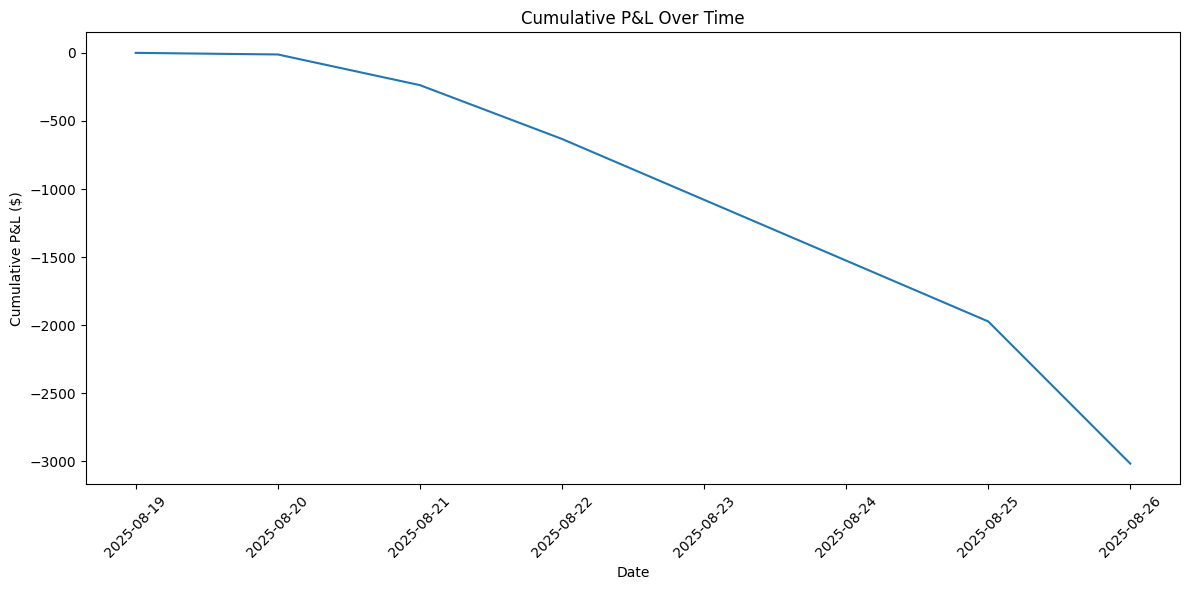

In [15]:

daily_pl = df.groupby('date')['net_pl'].sum().cumsum()

# Plot cumulative P&L
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_pl.index, daily_pl.values)
plt.title('Cumulative P&L Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
df.groupby('minute')['net_pl'].sum().cumsum()

minute
00:00:19.412049      -0.2190
00:01:03.325053      -0.3910
00:01:08.960299      -0.9574
00:01:14.487425       0.6799
00:01:14.617546       3.0633
                     ...    
23:53:19.896856   -3014.4542
23:53:51.575622   -3015.1360
23:56:24.089234   -3015.4015
23:56:26.281824   -3015.9994
23:59:20.876004   -3015.7794
Name: net_pl, Length: 7507, dtype: float64

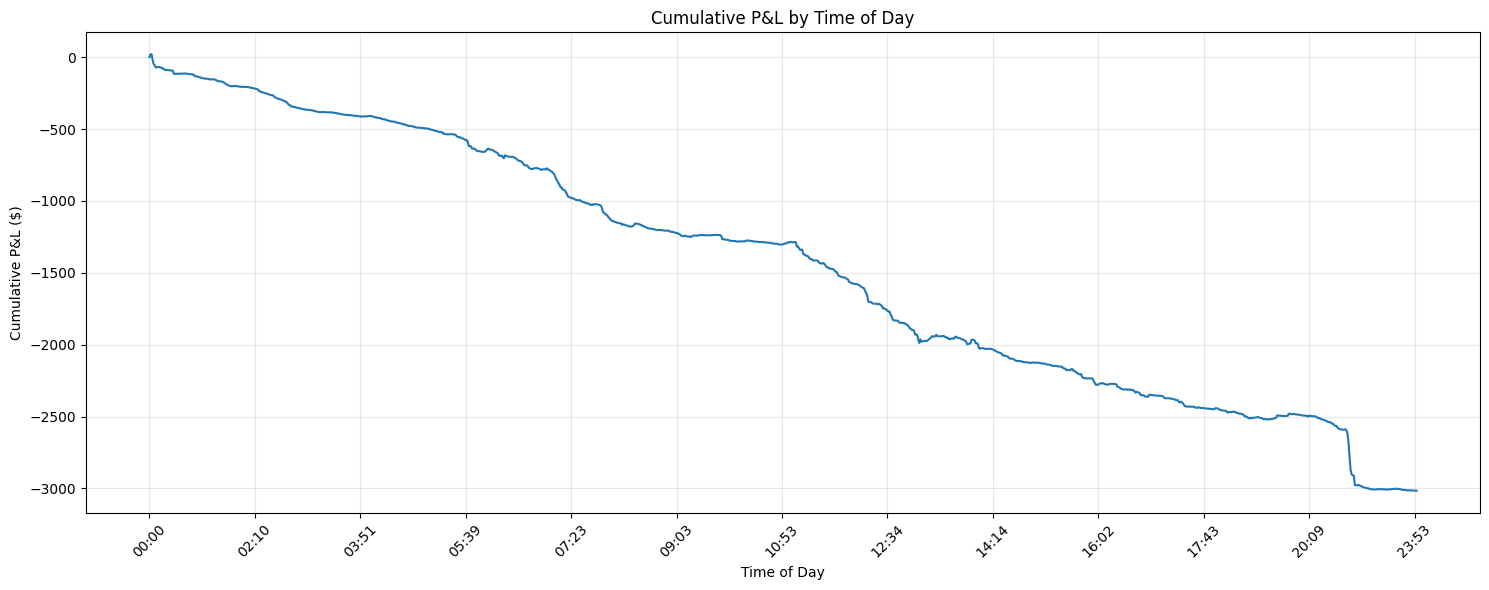


Most Profitable Times:
minute
13:05    24.8985
13:53    23.5669
06:21    21.1760
00:01    19.8164
19:09    16.3675
Name: net_pl, dtype: float64


In [17]:
# Create a time-based analysis
# Convert closeTime to just time part and group by minute
df['minute'] = df['closeTime'].dt.strftime('%H:%M')  # Format as HH:MM
daily_pl = df.groupby('minute')['net_pl'].sum()

# Sort by time for proper visualization
daily_pl = daily_pl.reindex(sorted(daily_pl.index))
cumulative_pl = daily_pl.cumsum()

# Plot cumulative P&L
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(len(cumulative_pl)), cumulative_pl.values)
plt.title('Cumulative P&L by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Cumulative P&L ($)')

# Set x-axis ticks to show times
plt.xticks(
    range(0, len(cumulative_pl), len(cumulative_pl)//12),  # Show 12 time points
    [cumulative_pl.index[i] for i in range(0, len(cumulative_pl), len(cumulative_pl)//12)],
    rotation=45
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some statistics about profitable times
print("\nMost Profitable Times:")
print(daily_pl.sort_values(ascending=False).head())

In [18]:
df['date'] = df['closeTime'].dt.date


In [19]:
df

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,closingTransactionIDs,...,takeProfitOrder,stopLossOrder,trade_duration,trade_duration_minutes,net_pl,units,side,is_winner,date,minute
0,77171,EUR_JPY,171.943,2025-08-26 14:00:19.837418690+00:00,1000,59.8660,CLOSED,0,0.2909,[77176],...,"{'id': '77172', 'createTime': '2025-08-26T14:0...","{'id': '77173', 'createTime': '2025-08-26T14:0...",0 days 00:00:58.890056162,0.981501,0.2909,1000,BUY,True,2025-08-26,14:01
1,77157,EUR_AUD,1.79616,2025-08-26 14:00:09.415334483+00:00,1000,59.8640,CLOSED,0,-0.5600,[77160],...,"{'id': '77158', 'createTime': '2025-08-26T14:0...","{'id': '77159', 'createTime': '2025-08-26T14:0...",0 days 00:00:02.097236290,0.034954,-0.5600,1000,BUY,False,2025-08-26,14:00
2,77133,EUR_AUD,1.79631,2025-08-26 13:58:21.429253135+00:00,1000,59.8717,CLOSED,0,-0.6200,[77154],...,"{'id': '77134', 'createTime': '2025-08-26T13:5...","{'id': '77135', 'createTime': '2025-08-26T13:5...",0 days 00:01:43.065895662,1.717765,-0.6200,1000,BUY,False,2025-08-26,14:00
3,77107,EUR_AUD,1.79630,2025-08-26 13:56:18.797517563+00:00,1000,59.8713,CLOSED,0,-0.6000,[77120],...,"{'id': '77108', 'createTime': '2025-08-26T13:5...","{'id': '77109', 'createTime': '2025-08-26T13:5...",0 days 00:00:30.012631275,0.500211,-0.6000,1000,BUY,False,2025-08-26,13:56
4,77099,CHF_JPY,183.417,2025-08-26 13:55:19.253794282+00:00,1000,63.8576,CLOSED,0,0.3846,[77138],...,"{'id': '77100', 'createTime': '2025-08-26T13:5...","{'id': '77101', 'createTime': '2025-08-26T13:5...",0 days 00:03:22.379067906,3.372984,0.3846,1000,BUY,True,2025-08-26,13:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,31,AUD_USD,0.64797,2025-08-19 13:38:02.981853131+00:00,-1000,33.3333,CLOSED,0,0.0461,[34],...,"{'id': '32', 'createTime': '2025-08-19T13:38:0...","{'id': '33', 'createTime': '2025-08-19T13:38:0...",0 days 00:04:31.145230885,4.519087,0.0461,-1000,SELL,True,2025-08-19,13:42
9569,25,AUD_USD,0.64889,2025-08-19 12:32:03.436072557+00:00,1000,33.3333,CLOSED,0,-0.1394,[28],...,"{'id': '26', 'createTime': '2025-08-19T12:32:0...","{'id': '27', 'createTime': '2025-08-19T12:32:0...",0 days 00:00:24.514026083,0.408567,-0.1394,1000,BUY,False,2025-08-19,12:32
9570,19,AUD_USD,0.64902,2025-08-19 12:31:03.866321825+00:00,1000,33.3333,CLOSED,0,-0.3408,[22],...,"{'id': '20', 'createTime': '2025-08-19T12:31:0...","{'id': '21', 'createTime': '2025-08-19T12:31:0...",0 days 00:00:26.982879917,0.449715,-0.3408,1000,BUY,False,2025-08-19,12:31
9571,11,EUR_USD,1.16917,2025-08-19 11:06:00.210461654+00:00,-1000,60.0327,CLOSED,0,0.1686,[16],...,"{'id': '12', 'createTime': '2025-08-19T11:06:0...","{'id': '13', 'createTime': '2025-08-19T11:06:0...",0 days 00:03:51.766752625,3.862779,0.1686,-1000,SELL,True,2025-08-19,11:09


In [20]:
response = api.request(positions.OpenPositions(accountID=account_id))
df = pd.DataFrame(response['positions'])
df['unrealizedPL'] = df['unrealizedPL'].astype(float)
df[df['unrealizedPL'] > 0].unrealizedPL.sum(),df[df['unrealizedPL'] < 0].unrealizedPL.sum()

(np.float64(19.3616), np.float64(-7.631600000000001))

In [21]:
df

,instrument,long,short,pl,resettablePL,financing,commission,dividendAdjustment,guaranteedExecutionFees,unrealizedPL,marginUsed
0,TRY_JPY,"{'units': '0', 'pl': '0.0000', 'resettablePL':...","{'units': '-5000', 'averagePrice': '3.593', 'p...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2835,46.9587
1,ZAR_JPY,"{'units': '0', 'pl': '-2.0063', 'resettablePL'...","{'units': '-9000', 'averagePrice': '8.360', 'p...",-6.5323,-6.5323,-0.4320,0.0000,0.0000,0.0000,-0.7350,39.3021
2,HKD_JPY,"{'units': '92000', 'averagePrice': '18.90893',...","{'units': '0', 'pl': '-3.3067', 'resettablePL'...",-28.6596,-28.6596,-0.2805,0.0000,0.0000,0.0000,11.0013,909.0442
3,SGD_JPY,"{'units': '0', 'pl': '-39.9619', 'resettablePL...","{'units': '-1000', 'averagePrice': '114.829', ...",-65.1608,-65.1608,0.0000,0.0000,0.0000,0.0000,0.1039,59.9524
4,EUR_AUD,"{'units': '3000', 'averagePrice': '1.79623', '...","{'units': '0', 'pl': '-31.3700', 'resettablePL...",-68.0500,-68.0500,0.0000,0.0000,0.0000,0.0000,-1.6500,179.5860
5,AUD_USD,"{'units': '2000', 'averagePrice': '0.64839', '...","{'units': '0', 'pl': '-21.2813', 'resettablePL...",-48.1547,-48.1547,-0.0312,0.0000,0.0000,0.0000,1.3187,66.6667
6,AUD_CAD,"{'units': '0', 'pl': '-40.0646', 'resettablePL...","{'units': '-1000', 'averagePrice': '0.89791', ...",-61.3253,-61.3253,-0.0597,0.0000,0.0000,0.0000,-0.5817,33.3333
7,AUD_SGD,"{'units': '14000', 'averagePrice': '0.83356', ...","{'units': '0', 'pl': '-12.9413', 'resettablePL...",-49.7387,-49.7387,0.0000,0.0000,0.0000,0.0000,5.7505,700.0000
8,AUD_CHF,"{'units': '0', 'pl': '-99.1060', 'resettablePL...","{'units': '-4000', 'averagePrice': '0.52182', ...",-116.6098,-116.6098,0.5936,0.0000,0.0000,0.0000,-0.6554,133.3333
9,CAD_SGD,"{'units': '24000', 'averagePrice': '0.92832', ...","{'units': '0', 'pl': '-5.8195', 'resettablePL'...",-14.9206,-14.9206,0.0000,0.0000,0.0000,0.0000,-0.9812,1335.8195


In [22]:
df['unrealizedPL'].sum()

np.float64(11.730000000000002)

In [23]:
profit = set(df[df['unrealizedPL'] > 0].instrument)

In [24]:
loss = set(df[df['unrealizedPL'] < 0].instrument)

In [25]:
profit.union(loss)

{'AUD_CAD',
 'AUD_CHF',
 'AUD_SGD',
 'AUD_USD',
 'CAD_CHF',
 'CAD_JPY',
 'CAD_SGD',
 'EUR_AUD',
 'EUR_GBP',
 'HKD_JPY',
 'NZD_CHF',
 'SGD_CHF',
 'SGD_JPY',
 'TRY_JPY',
 'ZAR_JPY'}

In [26]:
df

,instrument,long,short,pl,resettablePL,financing,commission,dividendAdjustment,guaranteedExecutionFees,unrealizedPL,marginUsed
0,TRY_JPY,"{'units': '0', 'pl': '0.0000', 'resettablePL':...","{'units': '-5000', 'averagePrice': '3.593', 'p...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.2835,46.9587
1,ZAR_JPY,"{'units': '0', 'pl': '-2.0063', 'resettablePL'...","{'units': '-9000', 'averagePrice': '8.360', 'p...",-6.5323,-6.5323,-0.4320,0.0000,0.0000,0.0000,-0.7350,39.3021
2,HKD_JPY,"{'units': '92000', 'averagePrice': '18.90893',...","{'units': '0', 'pl': '-3.3067', 'resettablePL'...",-28.6596,-28.6596,-0.2805,0.0000,0.0000,0.0000,11.0013,909.0442
3,SGD_JPY,"{'units': '0', 'pl': '-39.9619', 'resettablePL...","{'units': '-1000', 'averagePrice': '114.829', ...",-65.1608,-65.1608,0.0000,0.0000,0.0000,0.0000,0.1039,59.9524
4,EUR_AUD,"{'units': '3000', 'averagePrice': '1.79623', '...","{'units': '0', 'pl': '-31.3700', 'resettablePL...",-68.0500,-68.0500,0.0000,0.0000,0.0000,0.0000,-1.6500,179.5860
5,AUD_USD,"{'units': '2000', 'averagePrice': '0.64839', '...","{'units': '0', 'pl': '-21.2813', 'resettablePL...",-48.1547,-48.1547,-0.0312,0.0000,0.0000,0.0000,1.3187,66.6667
6,AUD_CAD,"{'units': '0', 'pl': '-40.0646', 'resettablePL...","{'units': '-1000', 'averagePrice': '0.89791', ...",-61.3253,-61.3253,-0.0597,0.0000,0.0000,0.0000,-0.5817,33.3333
7,AUD_SGD,"{'units': '14000', 'averagePrice': '0.83356', ...","{'units': '0', 'pl': '-12.9413', 'resettablePL...",-49.7387,-49.7387,0.0000,0.0000,0.0000,0.0000,5.7505,700.0000
8,AUD_CHF,"{'units': '0', 'pl': '-99.1060', 'resettablePL...","{'units': '-4000', 'averagePrice': '0.52182', ...",-116.6098,-116.6098,0.5936,0.0000,0.0000,0.0000,-0.6554,133.3333
9,CAD_SGD,"{'units': '24000', 'averagePrice': '0.92832', ...","{'units': '0', 'pl': '-5.8195', 'resettablePL'...",-14.9206,-14.9206,0.0000,0.0000,0.0000,0.0000,-0.9812,1335.8195


In [27]:
df = get_all_closed_trades(api, account_id)
print(f"Total closed trades: {df.shape[0]}")

Retrieved 500 trades, total: 500
Retrieved 500 trades, total: 1000
Retrieved 500 trades, total: 1500
Retrieved 500 trades, total: 2000
Retrieved 500 trades, total: 2500
Retrieved 500 trades, total: 3000
Retrieved 500 trades, total: 3500
Retrieved 500 trades, total: 4000
Retrieved 500 trades, total: 4500
Retrieved 500 trades, total: 5000
Retrieved 500 trades, total: 5500
Retrieved 500 trades, total: 6000
Retrieved 500 trades, total: 6500
Retrieved 500 trades, total: 7000
Retrieved 500 trades, total: 7500
Retrieved 500 trades, total: 8000
Retrieved 500 trades, total: 8500
Retrieved 500 trades, total: 9000
Retrieved 500 trades, total: 9500
Retrieved 73 trades, total: 9573
Total closed trades: 9573


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9573 entries, 0 to 9572
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     9573 non-null   object
 1   instrument             9573 non-null   object
 2   price                  9573 non-null   object
 3   openTime               9573 non-null   object
 4   initialUnits           9573 non-null   object
 5   initialMarginRequired  9573 non-null   object
 6   state                  9573 non-null   object
 7   currentUnits           9573 non-null   object
 8   realizedPL             9573 non-null   object
 9   closingTransactionIDs  9573 non-null   object
 10  financing              9573 non-null   object
 11  dividendAdjustment     9573 non-null   object
 12  closeTime              9573 non-null   object
 13  averageClosePrice      9573 non-null   object
 14  takeProfitOrder        9573 non-null   object
 15  stopLossOrder        

In [29]:
df

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,closingTransactionIDs,financing,dividendAdjustment,closeTime,averageClosePrice,takeProfitOrder,stopLossOrder
0,77171,EUR_JPY,171.943,2025-08-26T14:00:19.837418690Z,1000,59.8660,CLOSED,0,0.2909,[77176],0.0000,0.0000,2025-08-26T14:01:18.727474852Z,171.971,"{'id': '77172', 'createTime': '2025-08-26T14:0...","{'id': '77173', 'createTime': '2025-08-26T14:0..."
1,77157,EUR_AUD,1.79616,2025-08-26T14:00:09.415334483Z,1000,59.8640,CLOSED,0,-0.5600,[77160],0.0000,0.0000,2025-08-26T14:00:11.512570773Z,1.79560,"{'id': '77158', 'createTime': '2025-08-26T14:0...","{'id': '77159', 'createTime': '2025-08-26T14:0..."
2,77133,EUR_AUD,1.79631,2025-08-26T13:58:21.429253135Z,1000,59.8717,CLOSED,0,-0.6200,[77154],0.0000,0.0000,2025-08-26T14:00:04.495148797Z,1.79569,"{'id': '77134', 'createTime': '2025-08-26T13:5...","{'id': '77135', 'createTime': '2025-08-26T13:5..."
3,77107,EUR_AUD,1.79630,2025-08-26T13:56:18.797517563Z,1000,59.8713,CLOSED,0,-0.6000,[77120],0.0000,0.0000,2025-08-26T13:56:48.810148838Z,1.79570,"{'id': '77108', 'createTime': '2025-08-26T13:5...","{'id': '77109', 'createTime': '2025-08-26T13:5..."
4,77099,CHF_JPY,183.417,2025-08-26T13:55:19.253794282Z,1000,63.8576,CLOSED,0,0.3846,[77138],0.0000,0.0000,2025-08-26T13:58:41.632862188Z,183.454,"{'id': '77100', 'createTime': '2025-08-26T13:5...","{'id': '77101', 'createTime': '2025-08-26T13:5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,31,AUD_USD,0.64797,2025-08-19T13:38:02.981853131Z,-1000,33.3333,CLOSED,0,0.0461,[34],0.0000,0.0000,2025-08-19T13:42:34.127084016Z,0.64794,"{'id': '32', 'createTime': '2025-08-19T13:38:0...","{'id': '33', 'createTime': '2025-08-19T13:38:0..."
9569,25,AUD_USD,0.64889,2025-08-19T12:32:03.436072557Z,1000,33.3333,CLOSED,0,-0.1394,[28],0.0000,0.0000,2025-08-19T12:32:27.950098640Z,0.64880,"{'id': '26', 'createTime': '2025-08-19T12:32:0...","{'id': '27', 'createTime': '2025-08-19T12:32:0..."
9570,19,AUD_USD,0.64902,2025-08-19T12:31:03.866321825Z,1000,33.3333,CLOSED,0,-0.3408,[22],0.0000,0.0000,2025-08-19T12:31:30.849201742Z,0.64880,"{'id': '20', 'createTime': '2025-08-19T12:31:0...","{'id': '21', 'createTime': '2025-08-19T12:31:0..."
9571,11,EUR_USD,1.16917,2025-08-19T11:06:00.210461654Z,-1000,60.0327,CLOSED,0,0.1686,[16],0.0000,0.0000,2025-08-19T11:09:51.977214279Z,1.16906,"{'id': '12', 'createTime': '2025-08-19T11:06:0...","{'id': '13', 'createTime': '2025-08-19T11:06:0..."


In [30]:
pd.DataFrame([values for values in df['takeProfitOrder']]).iloc[0],pd.DataFrame([values for values in df['stopLossOrder']]).iloc[0],df.iloc[0]

(id                                                  77172
 createTime                 2025-08-26T14:00:19.837418690Z
 type                                          TAKE_PROFIT
 tradeID                                             77171
 price                                             171.971
 timeInForce                                           GTC
 triggerCondition                                  DEFAULT
 state                                              FILLED
 fillingTransactionID                                77176
 filledTime                 2025-08-26T14:01:18.727474852Z
 tradeClosedIDs                                    [77171]
 cancellingTransactionID                               NaN
 cancelledTime                                         NaN
 replacesOrderID                                       NaN
 Name: 0, dtype: object,
 id                                                  77173
 createTime                 2025-08-26T14:00:19.837418690Z
 type                          

In [31]:
df["takeProfitPrice"] = df["takeProfitOrder"].apply(lambda x: x.get("price") if isinstance(x, dict) else None)
df["stopLossPrice"]   = df["stopLossOrder"].apply(lambda x: x.get("price") if isinstance(x, dict) else None)

# Build clean summary DataFrame
trade_summary = df[[
    "id", 
    "instrument", 
    "price",               # open price
    "takeProfitPrice", 
    "stopLossPrice", 
    "averageClosePrice",   # close price
    "realizedPL"
]].rename(columns={
    "id": "tradeID",
    "price": "openPrice",
    "averageClosePrice": "closePrice"
})

In [32]:
trade_summary["realizedPL"] = trade_summary["realizedPL"].astype(float)

<Axes: title={'center': 'Number of Trades by Instrument'}, xlabel='instrument'>

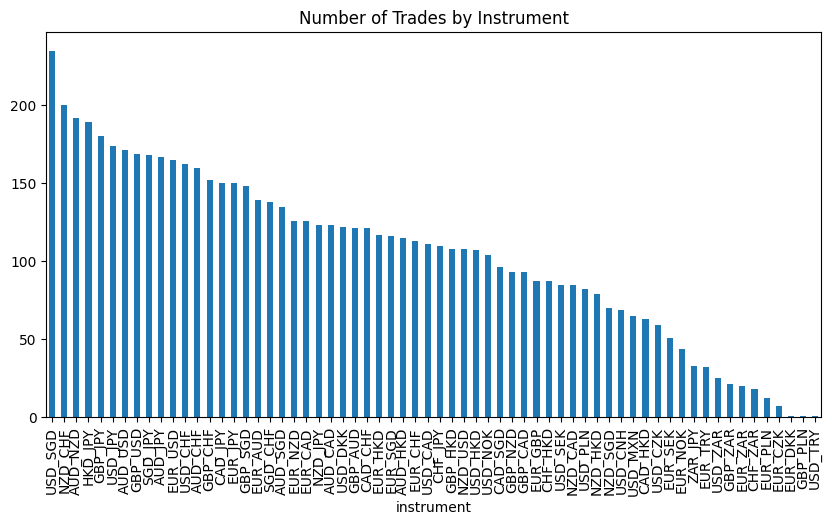

In [33]:
trade_summary[trade_summary['realizedPL'] < 0]['instrument'].value_counts().plot(kind='bar', figsize=(10,5), title='Number of Trades by Instrument')

In [34]:
df = trade_summary

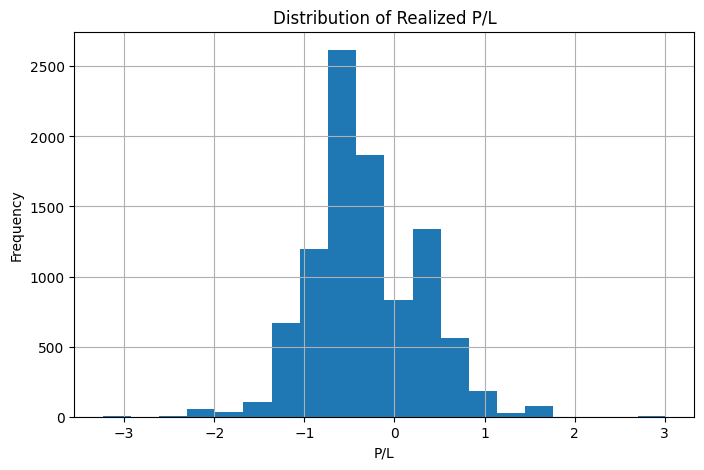

In [35]:
# 1. Distribution of realized P/L
plt.figure(figsize=(8,5))
df["realizedPL"].hist(bins=20)
plt.title("Distribution of Realized P/L")
plt.xlabel("P/L")
plt.ylabel("Frequency")
plt.show()


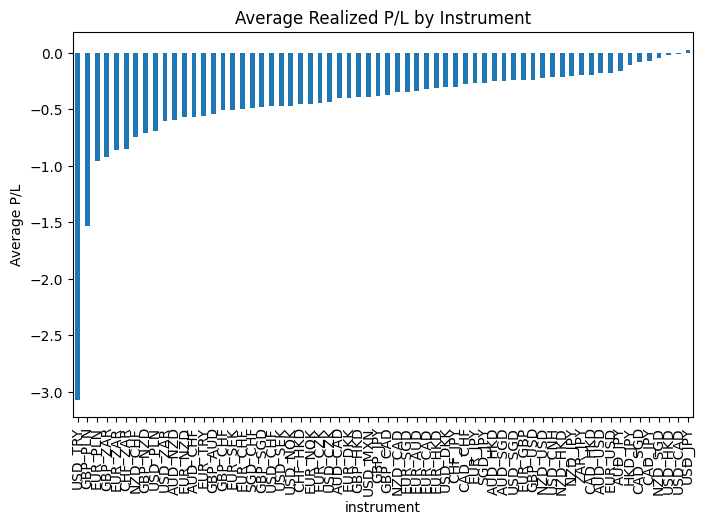

In [36]:

# 2. Average realized P/L by instrument
plt.figure(figsize=(8,5))
df.groupby("instrument")["realizedPL"].mean().sort_values().plot(kind="bar")
plt.title("Average Realized P/L by Instrument")
plt.ylabel("Average P/L")
plt.show()


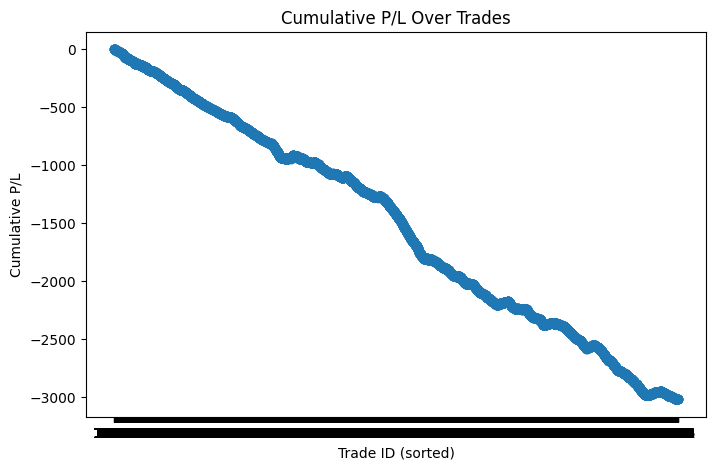

In [37]:

# 3. Cumulative P/L over trades (by tradeID order)
plt.figure(figsize=(8,5))
df_sorted = df.sort_values("tradeID")
df_sorted["cumulativePL"] = df_sorted["realizedPL"].cumsum()
plt.plot(df_sorted["tradeID"], df_sorted["cumulativePL"], marker="o")
plt.title("Cumulative P/L Over Trades")
plt.xlabel("Trade ID (sorted)")
plt.ylabel("Cumulative P/L")
plt.show()




<Figure size 800x500 with 0 Axes>

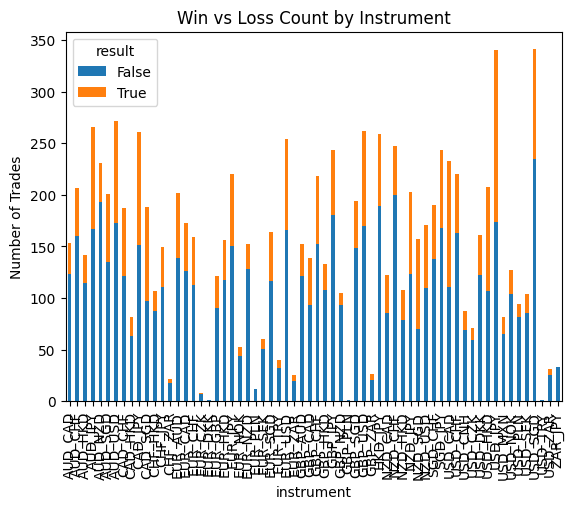

In [38]:
# 4. Win/Loss counts by instrument
plt.figure(figsize=(8,5))
(df.assign(result=df["realizedPL"] > 0)
   .groupby(["instrument","result"])["tradeID"]
   .count()
   .unstack(fill_value=0)
   .plot(kind="bar", stacked=True))
plt.title("Win vs Loss Count by Instrument")
plt.ylabel("Number of Trades")
plt.show()

In [39]:
trade_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9573 entries, 0 to 9572
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tradeID          9573 non-null   object 
 1   instrument       9573 non-null   object 
 2   openPrice        9573 non-null   object 
 3   takeProfitPrice  9573 non-null   object 
 4   stopLossPrice    9573 non-null   object 
 5   closePrice       9573 non-null   object 
 6   realizedPL       9573 non-null   float64
dtypes: float64(1), object(6)
memory usage: 523.7+ KB


In [43]:
df.head()

,tradeID,instrument,openPrice,takeProfitPrice,stopLossPrice,closePrice,realizedPL
0,77171,EUR_JPY,171.94300,171.97100,171.87100,171.97100,0.2909
1,77157,EUR_AUD,1.79616,1.79660,1.79560,1.79560,-0.5600
2,77133,EUR_AUD,1.79631,1.79672,1.79572,1.79569,-0.6200
3,77107,EUR_AUD,1.79630,1.79672,1.79572,1.79570,-0.6000
4,77099,CHF_JPY,183.41700,183.45000,183.35000,183.45400,0.3846


In [40]:
trade_summary["realizedPL"] = trade_summary["realizedPL"].astype(float)
trade_summary["tradeID"] = trade_summary["tradeID"].astype(int)
trade_summary['openPrice'] = trade_summary['openPrice'].astype(float)
trade_summary["takeProfitPrice"] = trade_summary["takeProfitPrice"].astype(float)
trade_summary["stopLossPrice"] = trade_summary["stopLossPrice"].astype(float)
trade_summary["closePrice"] = trade_summary["closePrice"].astype(float)

In [41]:
trade_summary["openPrice"] - trade_summary["takeProfitPrice"],trade_summary["openPrice"] - trade_summary["stopLossPrice"]

(0      -0.02800
 1      -0.00044
 2      -0.00041
 3      -0.00042
 4      -0.03300
          ...   
 9568    0.00002
 9569   -0.00021
 9570   -0.00008
 9571    0.00010
 9572    0.00004
 Length: 9573, dtype: float64,
 0       0.07200
 1       0.00056
 2       0.00059
 3       0.00058
 4       0.06700
          ...   
 9568   -0.00028
 9569    0.00009
 9570    0.00022
 9571   -0.00025
 9572   -0.00030
 Length: 9573, dtype: float64)

In [44]:
trade_summary.apply(np.where(trade_summary['closePrice'] == trade_summary['stopLossPrice'],1,0))

TypeError: 'numpy.int64' object is not callable